In [ ]:
import os
import sys
import urllib.request

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
import stellargraph as sg

In [ ]:
adj_file_path = r"adj_bin_new_dataset.csv"
file_path = r'state_X_time.csv'
x = pd.read_csv(file_path, index_col=0)
y = pd.read_csv(adj_file_path, index_col=0)

adj = np.matrix(y.to_numpy())


In [ ]:
x[x<=0] = 1

In [ ]:
state_data = x.fillna(0)

In [ ]:
num_nodes, time_len = state_data.shape
print("No. of states:", num_nodes, "\nNo of timesteps:", time_len)

No. of states: 52 
No of timesteps: 368


In [ ]:
def train_test_split(data, train_portion):
    time_len = data.shape[1]
    train_size = int(time_len * train_portion)
    train_data = np.array(data.iloc[:, :train_size])
    test_data = np.array(data.iloc[:, train_size:])
    return train_data, test_data

In [ ]:
train_rate = 0.62

In [ ]:
train_data, test_data = train_test_split(state_data, train_rate)

In [ ]:
train_data, val_data = train_test_split(pd.DataFrame(train_data), 0.8)
print("Train data: ", train_data.shape)
print("Test data: ", test_data.shape)
print("Adj data: ", adj.shape)

Train data:  (52, 182)
Test data:  (52, 140)
Adj data:  (52, 52)


In [ ]:
def scale_data(train_data, test_data):
    max_deaths = train_data.max()
    min_deaths = train_data.min()
    train_scaled = (train_data - min_deaths) / (max_deaths - min_deaths)
    test_scaled = (test_data - min_deaths) / (max_deaths - min_deaths)
    return train_scaled, test_scaled

In [ ]:
def scale_data_log(train_data, test_data):
    train_data 
    train_scaled = np.log(train_data)
    test_scaled = np.log(test_data)
    return train_scaled, test_scaled

In [ ]:
train_scaled, test_scaled = scale_data(train_data, test_data)
train_scaled, val_scaled = scale_data(train_data, val_data)

In [ ]:
seq_len = 10
pre_len = 14

In [ ]:
def sequence_data_preparation(seq_len, pre_len, train_data, test_data):
    trainX, trainY, testX, testY = [], [], [], []

    for i in range(train_data.shape[1] - int(seq_len + pre_len - 1)):
        a = train_data[:, i : i + seq_len + pre_len]
        trainX.append(a[:, :seq_len])
        trainY.append(a[:, :pre_len])

    for i in range(test_data.shape[1] - int(seq_len + pre_len - 1)):
        b = test_data[:, i : i + seq_len + pre_len]
        testX.append(b[:, :seq_len])
        testY.append(b[:, :pre_len])

    trainX = np.array(trainX)
    trainY = np.array(trainY)
    testX = np.array(testX)
    testY = np.array(testY)

    return trainX, trainY, testX, testY

In [ ]:
trainX, trainY, testX, testY = sequence_data_preparation(
    seq_len, pre_len, train_scaled, test_scaled
)
trainX, trainY, valX, valY = sequence_data_preparation(
    seq_len, pre_len, train_scaled, val_scaled
)

print(trainX.shape)
print(trainY.shape)
print(valX.shape)
print(valY.shape)
print(testX.shape)
print(testY.shape)

(271, 52, 10)
(271, 52, 14)
(51, 52, 10)
(51, 52, 14)
(117, 52, 10)
(117, 52, 14)


In [ ]:
from stellargraph.layer import GCN_LSTM
from stellargraph.layer.gcn_lstm import FixedAdjacencyGraphConvolution

In [ ]:
from tensorflow.keras.layers import Embedding, Input, GRU

x = Input(shape=(None,))
x = Embedding(input_dim=50, output_dim=16, mask_zero=True)(x)
x = GRU(units=256)(x)

<ipython-input-410-25d50c38c029>:4: ExperimentalWarning: GCN_LSTM is experimental: Lack of unit tests and code refinement (see: https://github.com/stellargraph/stellargraph/issues/1132, https://github.com/stellargraph/stellargraph/issues/1526, https://github.com/stellargraph/stellargraph/issues/1564). It may be difficult to use and may have major changes at any time.
  gcn_lstm = GCN_LSTM(


Model: "model_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_110 (InputLayer)       [(None, 52, 10)]          0         
_________________________________________________________________
tf.expand_dims_50 (TFOpLambd (None, 52, 10, 1)         0         
_________________________________________________________________
reshape_150 (Reshape)        (None, 52, 10)            0         
_________________________________________________________________
fixed_adjacency_graph_convol (None, 52, 32)            3076      
_________________________________________________________________
fixed_adjacency_graph_convol (None, 52, 32)            3780      
_________________________________________________________________
reshape_151 (Reshape)        (None, 52, 32, 1)         0         
_________________________________________________________________
permute_50 (Permute)         (None, 32, 52, 1)         0  

h= 5, SMAPE: 11.947745305751601
Model: "model_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_120 (InputLayer)       [(None, 52, 10)]          0         
_________________________________________________________________
tf.expand_dims_55 (TFOpLambd (None, 52, 10, 1)         0         
_________________________________________________________________
reshape_165 (Reshape)        (None, 52, 10)            0         
_________________________________________________________________
fixed_adjacency_graph_convol (None, 52, 32)            3076      
_________________________________________________________________
fixed_adjacency_graph_convol (None, 52, 32)            3780      
_________________________________________________________________
reshape_166 (Reshape)        (None, 52, 32, 1)         0         
_________________________________________________________________
permute_55 (Permute)      

h= 10, SMAPE: 8.690979739741145
Model: "model_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_130 (InputLayer)       [(None, 52, 10)]          0         
_________________________________________________________________
tf.expand_dims_60 (TFOpLambd (None, 52, 10, 1)         0         
_________________________________________________________________
reshape_180 (Reshape)        (None, 52, 10)            0         
_________________________________________________________________
fixed_adjacency_graph_convol (None, 52, 32)            3076      
_________________________________________________________________
fixed_adjacency_graph_convol (None, 52, 32)            3780      
_________________________________________________________________
reshape_181 (Reshape)        (None, 52, 32, 1)         0         
_________________________________________________________________
permute_60 (Permute)      

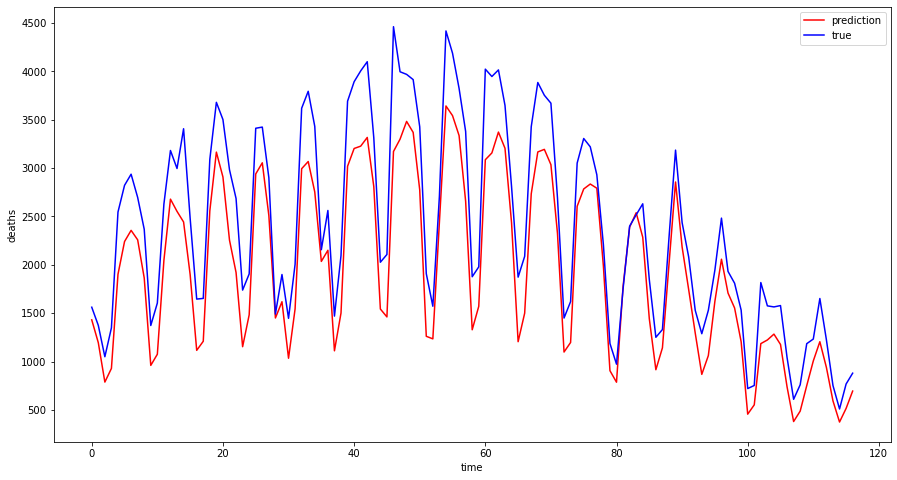

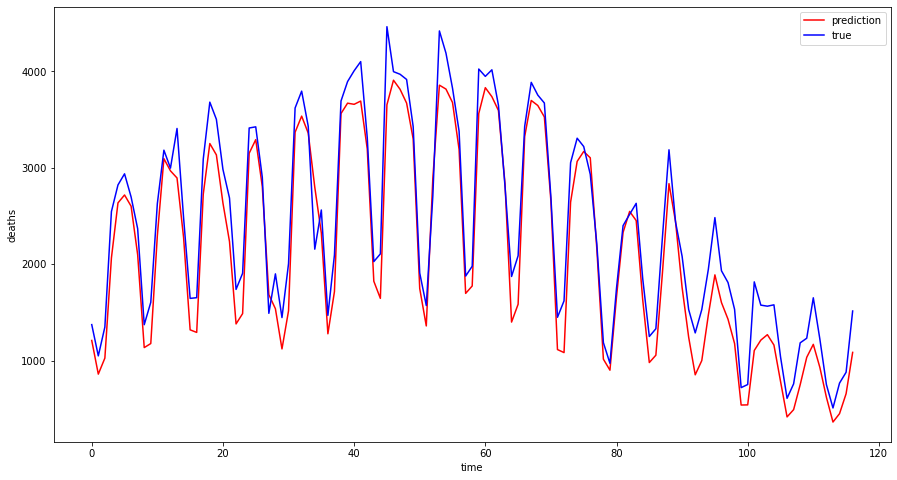

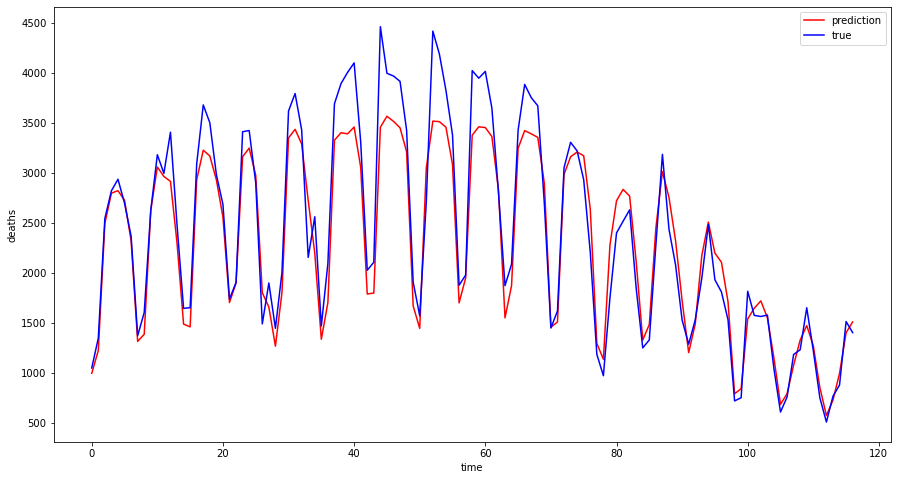

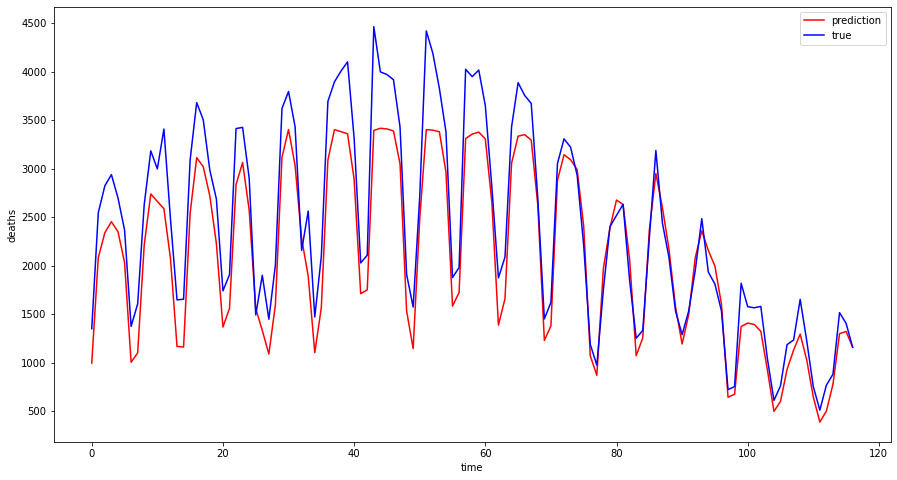

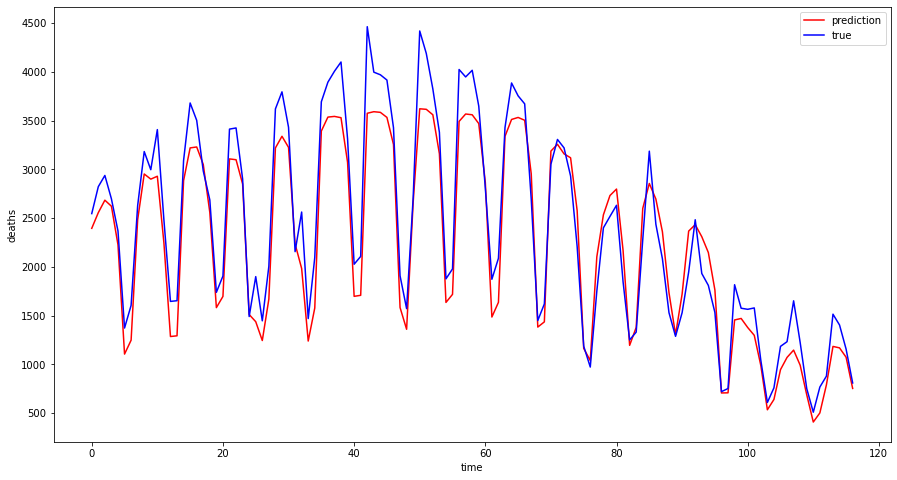

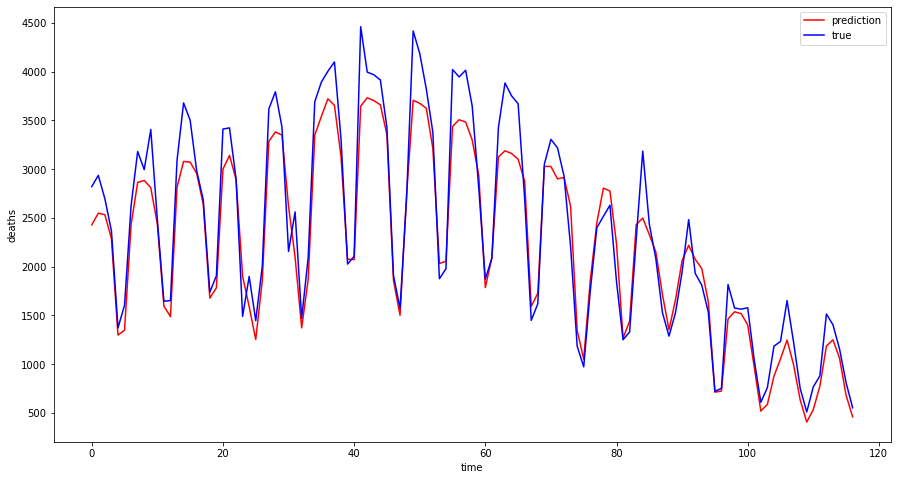

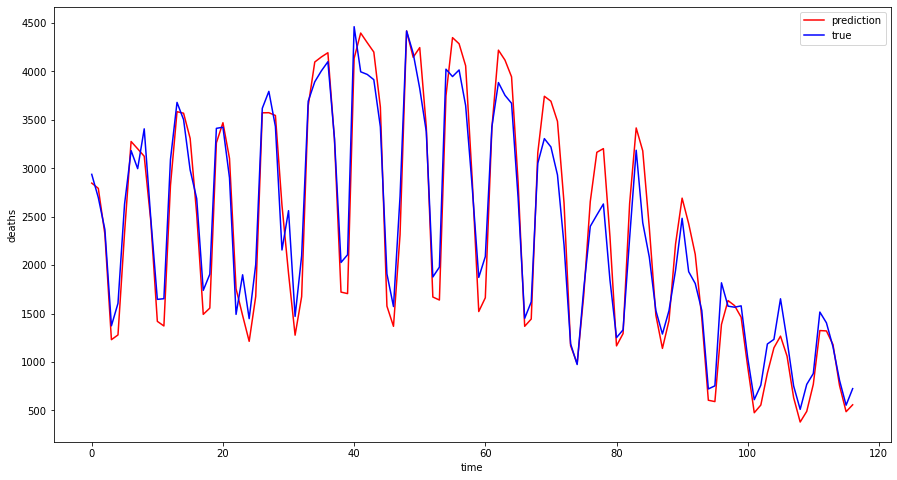

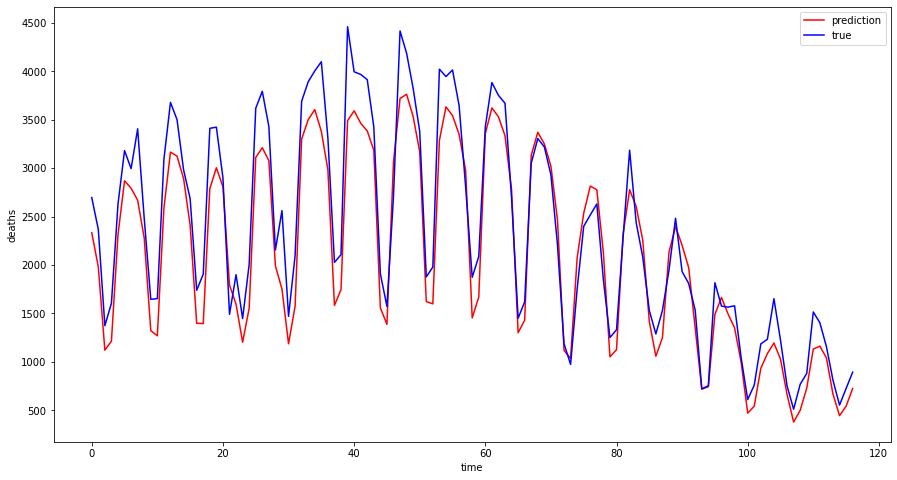

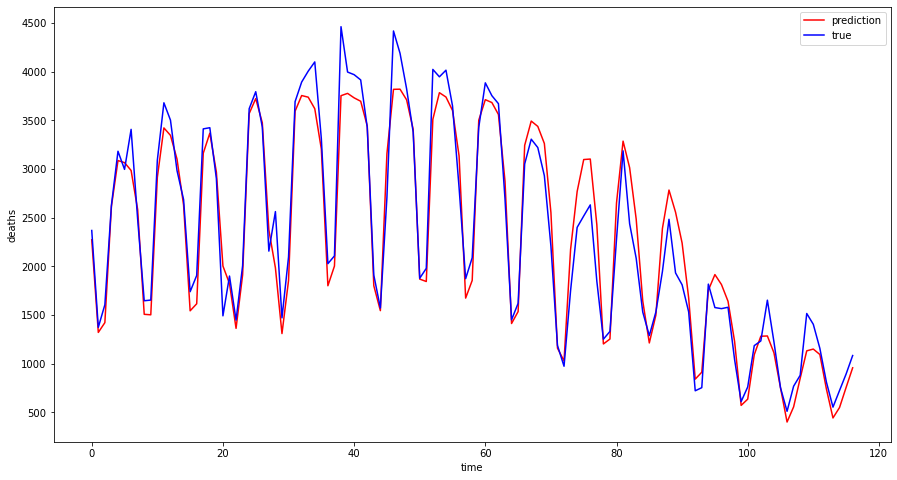

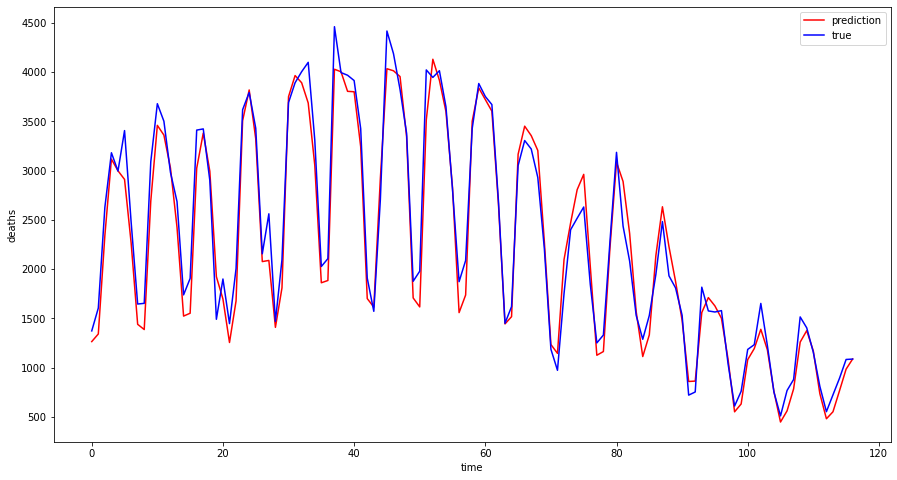

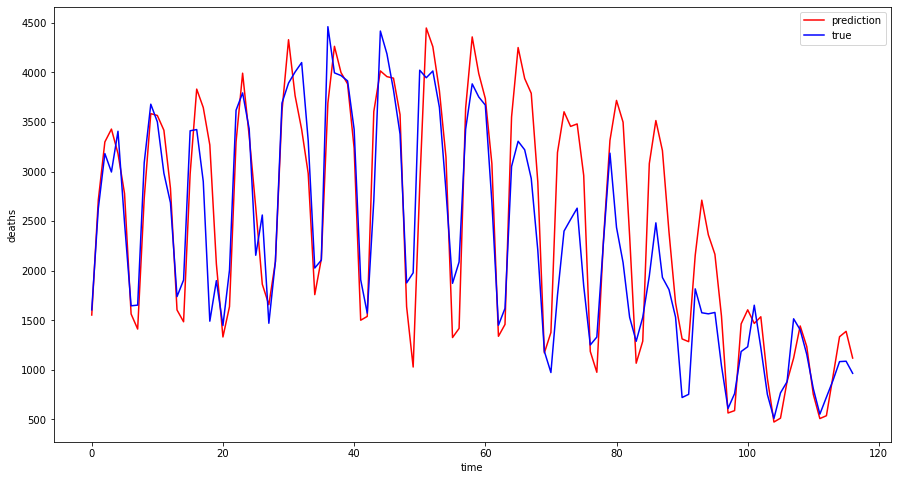

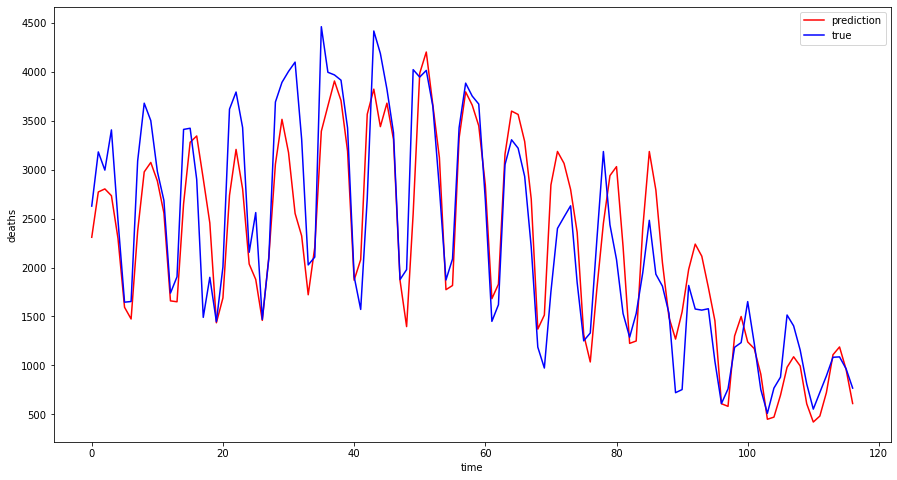

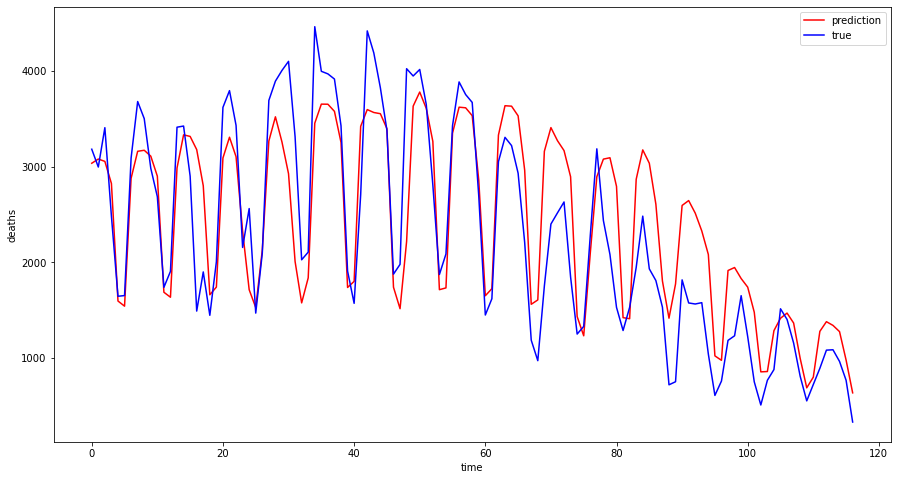

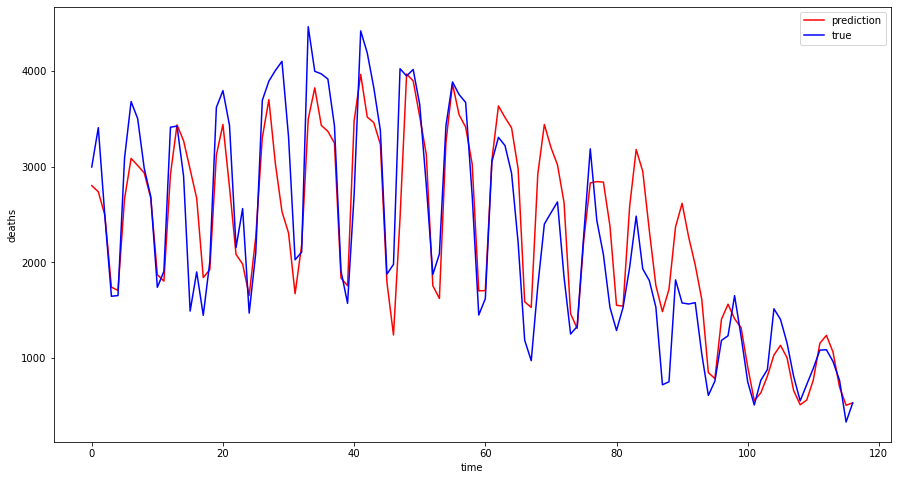

In [ ]:
current_h = 0
from stellargraph.layer import GCN_LSTM
for current_h in range(14):
    gcn_lstm = GCN_LSTM(
        seq_len=seq_len,
        adj=adj,
        gc_layer_sizes=[32, 32],
        gc_activations=["relu", "relu"],
        lstm_layer_sizes=[300],
        lstm_activations=["tanh"],
    )
    x_input, x_output = gcn_lstm.in_out_tensors()
    model = Model(inputs=x_input, outputs=x_output)
    model.compile(optimizer="adam", loss="mae", metrics=['mae'])
    model.summary()

    history = model.fit(
        trainX,
        trainY[:,:,current_h],
        epochs=500,
        batch_size=10,
        verbose=0,
        shuffle=True,
        validation_data=(valX, valY[:,:,current_h]),
    )

    ythat = model.predict(trainX)
    yhat = model.predict(testX)

    max_deaths = train_data.max()
    min_deaths = train_data.min()

    train_rescref = np.array((trainY * (max_deaths - min_deaths)) + min_deaths)
    test_rescref = np.array((testY * (max_deaths - min_deaths)) + min_deaths)

    train_rescpred = np.array((ythat * (max_deaths - min_deaths)) + min_deaths)
    test_rescpred  = np.array((yhat * (max_deaths - min_deaths)) + min_deaths)


    true_sum = []
    pred_sum = []
    for i in range(len(test_rescpred)):
        pred_sum.append(test_rescpred[i].sum())
        true_sum.append(test_rescref[i, :, current_h].sum())


    ##all test result visualization
    fig1 = plt.figure(figsize=(15, 8))
    #    ax1 = fig1.add_subplot(1,1,1)
    a_pred = pred_sum
    a_true = true_sum
    plt.plot(a_pred, "r-", label="prediction")
    plt.plot(a_true, "b-", label="true")
    plt.xlabel("time")
    plt.ylabel("deaths")
    plt.legend(loc="best", fontsize=10)
#     plt.show()

    print(f'h= {current_h+1}, SMAPE: {smape(true_sum,pred_sum)}')

In [ ]:
current_h = 0
from stellargraph.layer import GCN_LSTM
for current_h in range(14):
    gcn_lstm = GCN_LSTM(
        seq_len=seq_len,
        adj=adj,
        gc_layer_sizes=[32, 32],
        gc_activations=["relu", "relu"],
        lstm_layer_sizes=[300],
        lstm_activations=["tanh"],
    )
    x_input, x_output = gcn_lstm.in_out_tensors()
    model = Model(inputs=x_input, outputs=x_output)
    model.compile(optimizer="adam", loss="mae", metrics=['mae'])

    history = model.fit(
        trainX,
        trainY[:,:,current_h],
        epochs=500,
        batch_size=10,
        verbose=0,
        shuffle=True,
        validation_data=(valX, valY[:,:,current_h]),
    )

    ythat = model.predict(trainX)
    yhat = model.predict(testX)

    max_deaths = train_data.max()
    min_deaths = train_data.min()

    train_rescref = np.array((trainY * (max_deaths - min_deaths)) + min_deaths)
    test_rescref = np.array((testY * (max_deaths - min_deaths)) + min_deaths)

    train_rescpred = np.array((ythat * (max_deaths - min_deaths)) + min_deaths)
    test_rescpred  = np.array((yhat * (max_deaths - min_deaths)) + min_deaths)


    true_sum = []
    pred_sum = []
    for i in range(len(test_rescpred)):
        pred_sum.append(test_rescpred[i].sum())
        true_sum.append(test_rescref[i, :, current_h].sum())
    
    smape_score = smape(true_sum,pred_sum)
    
    model.save(f'./models/h-{current_h+1}-smape-{smape_score}.h5')
    
    print(f'h= {current_h+1}, SMAPE: {smape_score}')

<ipython-input-411-39117112074a>:4: ExperimentalWarning: GCN_LSTM is experimental: Lack of unit tests and code refinement (see: https://github.com/stellargraph/stellargraph/issues/1132, https://github.com/stellargraph/stellargraph/issues/1526, https://github.com/stellargraph/stellargraph/issues/1564). It may be difficult to use and may have major changes at any time.
  gcn_lstm = GCN_LSTM(


h= 1, SMAPE: 20.20658058091689
h= 2, SMAPE: 7.914280174067449
h= 3, SMAPE: 9.720828387792224
h= 4, SMAPE: 17.823614993133035
h= 5, SMAPE: 8.771109148463282
h= 6, SMAPE: 21.63661409059855
h= 7, SMAPE: 16.768237593045438
h= 8, SMAPE: 9.412905193375892
h= 9, SMAPE: 12.882985348553282
h= 10, SMAPE: 9.143455739490467
h= 11, SMAPE: 17.571726486989203
h= 12, SMAPE: 18.677591472036596
h= 13, SMAPE: 23.577412167693197
h= 14, SMAPE: 21.60117944882819
